In [1]:
import numpy as np
from glob import glob
import os
import des_utils
import des_io
import trigColors
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'
import matplotlib.transforms as transforms
from scipy.stats import binom


des_utils.py:317: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: invalid value encountered in divide
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:55: RuntimeWarning: invalid value encountered in divide
trigColors.py:53: RuntimeWarning: invalid value encountered in log10
  imag = -2.5*np.log10(ibandinfo[i][2][isellist[i]][0])


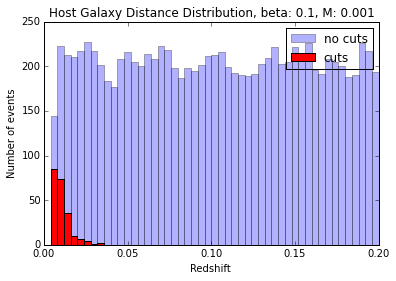

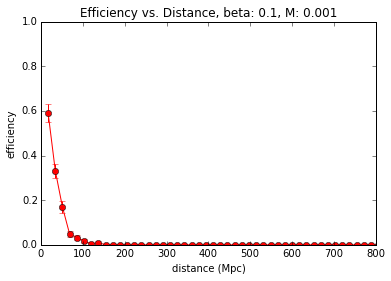

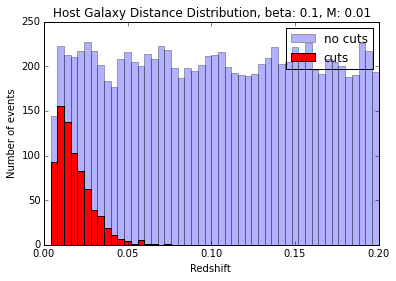

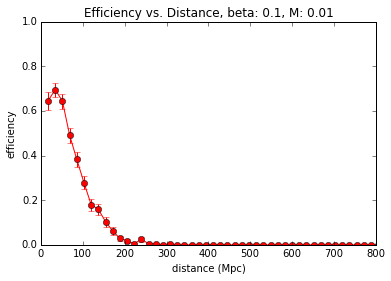

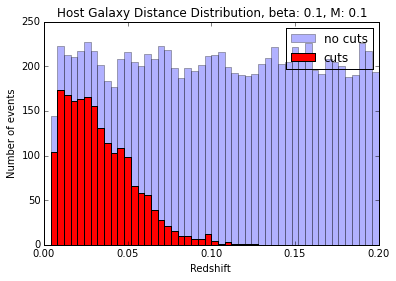

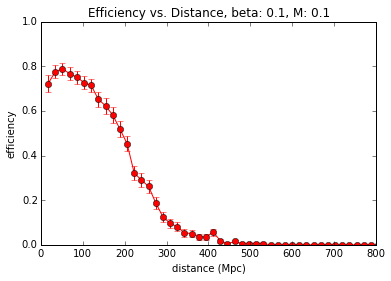

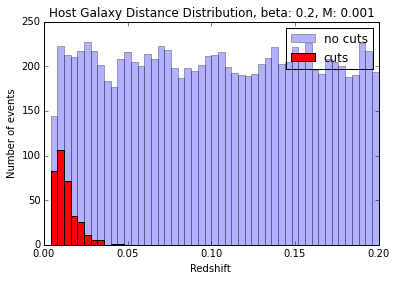

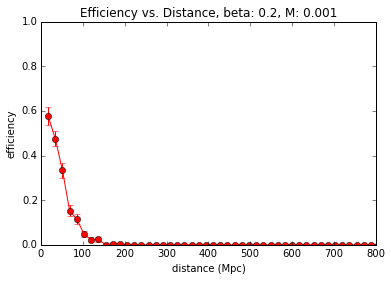

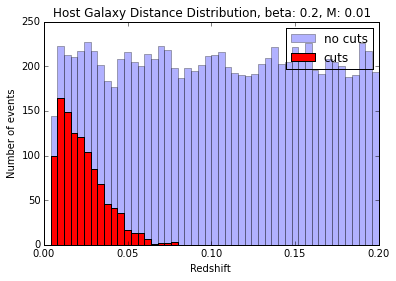

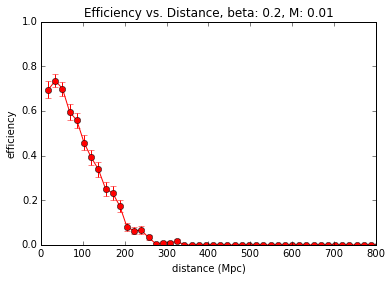

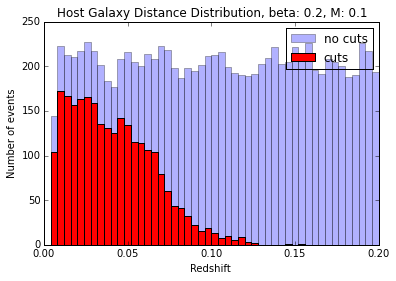

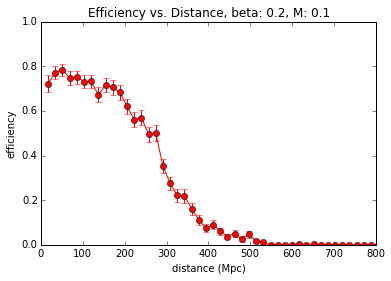

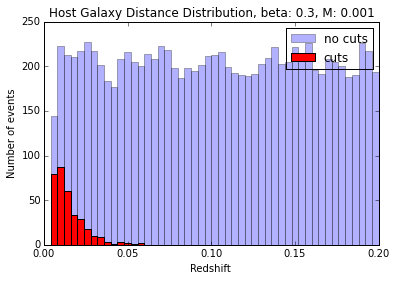

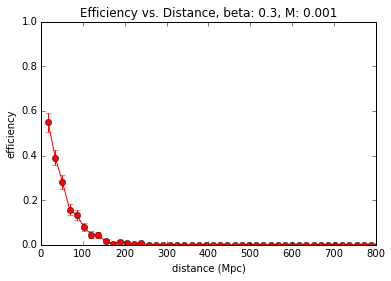

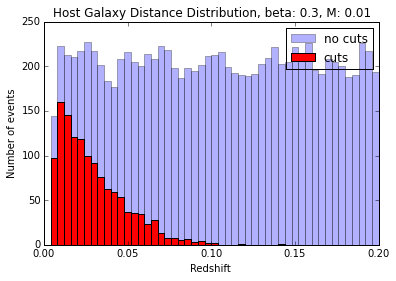

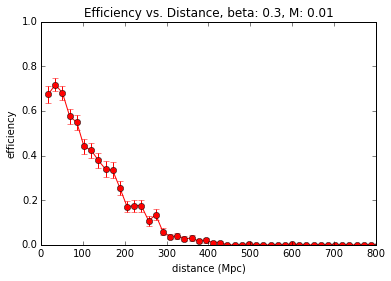

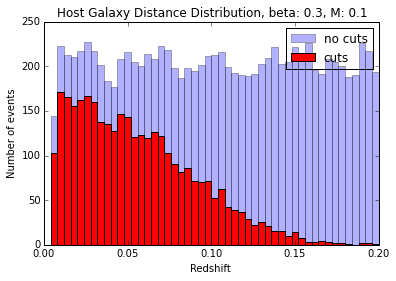

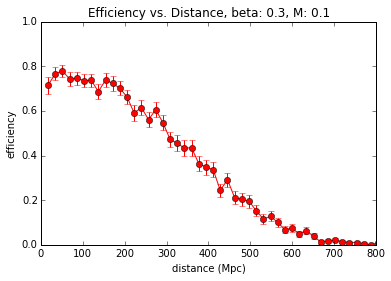

In [5]:
newpath = "EfficiencyVsDistPlots_" 
if not os.path.exists(newpath): os.makedirs(newpath)
beta = ['0.1','0.2','0.3']
Msol = ['0.001','0.01','0.1']
for b in beta:
    for M in Msol:
        lc = "b"+b+"_m"+M
        simpath = "../KNSimDataFlat081115/ZD_KNDES_" + lc + "/*DAT"
        dumpfile = "../KNSimDataFlat081115/ZD_KNDES_" + lc + "/ZD_KNDES_"+ lc + ".DUMP"
        dumpdata = np.genfromtxt(dumpfile,skip_header=2)
        dumpz = dumpdata[:,7]
        filetypes = ['sim']#['sim','data']
        paths = [simpath,"../DESY1_numepoch1_iz_real_text/*.dat"]
        fieldtypes = ['shallow','deep']
        dict1 = dict()  
        for n,fieldtype in enumerate(fieldtypes):
            dict1['sim_'+fieldtype] = trigColors.trigColors(simpath,'sim',fieldtype)
            dict1['sim_'+fieldtype]['detections'] = des_utils.get_detection_flags_list(dict1['sim_'+fieldtype]['cnites'],
                                                                                             dict1['sim_'+fieldtype]['zbandinfo'],
                                                                                             dict1['sim_'+fieldtype]['ibandinfo'],
                                                                                             3,10,1)
        headers_shallow = [el for i,el in enumerate(dict1['sim_shallow']['headers'])]
        headers_deep = [el for i,el in enumerate(dict1['sim_deep']['headers'])]
        photoznocuts_s = np.array([float(el['REDSHIFT_FINAL']) for i,el in enumerate(headers_shallow)])
        photoznocuts_d = np.array([float(el['REDSHIFT_FINAL']) for i,el in enumerate(headers_deep)])
        trigsel_s = dict1['sim_shallow']['trigs']
        photoZsel_s = dict1['sim_shallow']['photoZcutsel']
        detsel_s = dict1['sim_shallow']['detections']
        multitrigsel_s = dict1['sim_shallow']['multitrig']
        trigsel_d = dict1['sim_deep']['trigs']
        photoZsel_d = dict1['sim_deep']['photoZcutsel']
        detsel_d = dict1['sim_deep']['detections']
        multitrigsel_d = dict1['sim_deep']['multitrig']
        sel_s = trigsel_s & (~photoZsel_s) & detsel_s & multitrigsel_s
        sel_d = trigsel_d & (~photoZsel_d) & detsel_d & multitrigsel_d
        photozcuts_s = photoznocuts_s[sel_s]
        photozcuts_d = photoznocuts_d[sel_d]
        photozcuts = np.concatenate([photozcuts_s,photozcuts_d])
        histnocuts,binsnocuts = np.histogram(dumpz,bins=50,range=(0,0.2));
        histnocuts = np.array([float(nocuts) for i,nocuts in enumerate(histnocuts)])
        widthsnocuts = np.diff(binsnocuts)
        histcuts,binscuts = np.histogram(photozcuts,bins=50,range=(0,0.2));
        histcuts = np.array([float(cuts) for i,cuts in enumerate(histcuts)])
        widthscuts = np.diff(binscuts)
        plt.figure();
        plt.bar(binsnocuts[:-1], histnocuts, widthsnocuts,alpha=0.3,color='b');
        plt.bar(binscuts[:-1], histcuts, widthscuts,alpha=1,color='r');
        plt.xlabel('Redshift');
        plt.ylabel('Number of events');
        plt.legend(['no cuts','cuts']);
        plt.title('Host Galaxy Distance Distribution, '+'beta: '+b+', M: '+M);
        plt.savefig(newpath+"/zdistribution_"+lc+".png")
        plt.figure();
        hi = np.divide(histcuts,histnocuts)
        errors = np.divide(np.sqrt(np.multiply(histcuts,(1-np.divide(histcuts,histnocuts)))),histnocuts)
        H0 = 70.0 # km/s/mpc
        c = 3e5 # km/s
        mpclabels = binscuts[:-1]*c/H0
        plt.errorbar(mpclabels, hi, yerr = errors,color='r',ls='-',fmt='o');
        plt.axis([0,800,0,1]);
        plt.xlabel('distance (Mpc)');
        plt.ylabel('efficiency');
        plt.title('Efficiency vs. Distance, '+'beta: '+b+', M: '+M);
        plt.savefig(newpath+"/EffVsDist_"+lc+".png")

[        nan         nan         nan         nan         nan         nan
  0.71428571  0.74683544  0.75247525  0.71428571  0.75        0.75294118
  0.70588235  0.71212121  0.66666667  0.67676768  0.79347826  0.82352941
  0.79012346  0.79310345  0.73417722  0.84285714  0.71428571  0.75
  0.78082192  0.73417722  0.65714286  0.68656716  0.76388889  0.65079365
  0.63793103  0.62068966  0.76666667  0.83928571  0.68627451  0.71014493
  0.70689655  0.69811321  0.65116279  0.73170732  0.675       0.61764706
  0.68571429  0.74285714  0.71875     0.64516129  0.65714286  0.67741935
  0.65384615  0.61538462  0.5625      0.55555556  0.57142857  0.55555556
  0.5625      0.75        0.5         0.52631579  0.64285714  0.63636364
  0.55        0.28571429  0.58333333  0.57142857  0.54545455  0.33333333
  0.75        0.71428571  0.5         0.2         1.          0.          0.4
  0.          0.125       0.          0.25        0.          0.          0.25
  0.          0.          0.          0.      

/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in divide


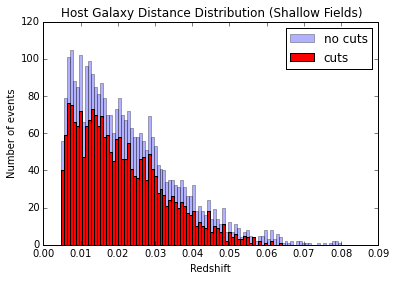

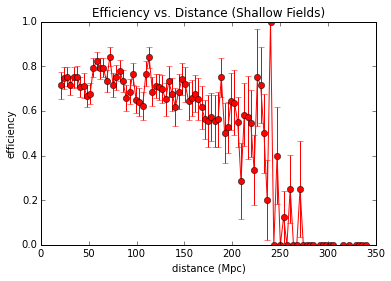

In [88]:

headers = [el for i,el in enumerate(dict1['sim_shallow']['headers'])]
photoznocuts = np.array([float(el['REDSHIFT_FINAL']) for i,el in enumerate(headers)]) 
trigsel = dict1['sim_shallow']['trigs']
photoZsel = dict1['sim_shallow']['photoZcutsel']
detsel = dict1['sim_shallow']['detections']
multitrigsel = dict1['sim_shallow']['multitrig']
sel = trigsel & (~photoZsel) & detsel & multitrigsel
photozcuts = photoznocuts[sel]
histnocuts,binsnocuts = np.histogram(photoznocuts,bins=100,range=(0,0.08));
histnocuts = np.array([float(nocuts) for i,nocuts in enumerate(histnocuts)])
widthsnocuts = np.diff(binsnocuts)
histcuts,binscuts = np.histogram(photozcuts,bins=100,range=(0,0.08));
histcuts = np.array([float(cuts) for i,cuts in enumerate(histcuts)])
widthscuts = np.diff(binscuts)
plt.bar(binsnocuts[:-1], histnocuts, widthsnocuts,alpha=0.3,color='b');
plt.bar(binscuts[:-1], histcuts, widthscuts,alpha=1,color='r');
plt.xlabel('Redshift');
plt.ylabel('Number of events');
plt.legend(['no cuts','cuts']);
plt.title('Host Galaxy Distance Distribution (Shallow Fields)');
plt.figure();
hi = np.divide(histcuts,histnocuts)
errors = np.divide(np.sqrt(np.multiply(histcuts,(1-np.divide(histcuts,histnocuts)))),histnocuts)
H0 = 70.0 # km/s/mpc
c = 3e5 # km/s
mpclabels = binscuts[:-1]*c/H0
plt.errorbar(mpclabels, hi, yerr = errors,color='r',ls='-',fmt='o');
plt.axis([0,350,0,1]);
plt.xlabel('distance (Mpc)');
plt.ylabel('efficiency');
plt.title('Efficiency vs. Distance (Shallow Fields)');

1001 1001


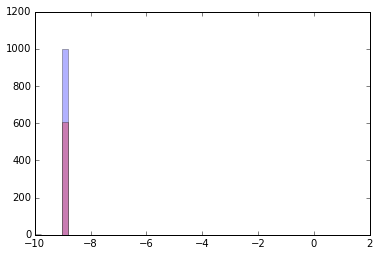

In [27]:
headers = [el for i,el in enumerate(dict1['sim_shallow']['headers'])]
photoznocuts = np.array([float(el['HOSTGAL_PHOTOZ']) for i,el in enumerate(headers)]) 
trigsel = dict1['sim_shallow']['trigs']
photoZsel = dict1['sim_shallow']['photoZcutsel']
detsel = dict1['sim_shallow']['detections']
multitrigsel = dict1['sim_shallow']['multitrig']
sel = trigsel & (~photoZsel) & detsel & multitrigsel
print len(sel),len(photoznocuts)
photozcuts = photoznocuts[sel]
plt.hist(photoznocuts,bins=50,range=(-10,2),color='b',alpha=0.3);
plt.hist(photozcuts,bins=50,range=(-10,2),color='r',alpha=0.3);


In [55]:
H0 = 70.0 # km/s/mpc
c = 3e5 # km/s
z = 0.05
d = c*z/H0
print d

214.285714286
